In [1]:
#Importin libraries
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

In [3]:
#Importing data frame Pig.E Bank
file_path = r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\5. Data Ethics & Applied Analytics\5.4-PigEBank-Client-Data set.csv'
df = pd.read_csv(file_path)

# To check the first few rows of the dataset
df.head()

,Row_Number,Customer_ID,Last_Name,Credit Score,Country,Gender,Age,Tenure,Balance,NumOfProducts,...,ExitedFromBank?,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,1,15634602,Hargrave,619,Franceance,Female,42,2,$0.00,1,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,15647311,Hill,608,Spain,Female,41,1,"$83,807.86",1,...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,15619304,Onio,502,Franceance,Female,42,8,"$159,660.80",3,...,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4,15701354,Boni,699,Franceance,Female,39,1,$0.00,2,...,0,NaN,NaN,NaN,Last_Name= null or Y?an or H?,Credit s=Blank,Gender=0,Age= 2 or NULL,Balance =$0,Est. Sala
4,5,15737888,Mitchell,850,Spain,Female,43,2,"$125,510.82",1,...,0,NaN,NaN,NaN,4,3,1,12,349,2


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 23 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Row_Number        970 non-null    int64  
 1   Customer_ID       970 non-null    int64  
 2   Last_Name         970 non-null    object 
 3   Credit Score      970 non-null    int64  
 4   Country           970 non-null    object 
 5   Gender            970 non-null    object 
 6   Age               970 non-null    int64  
 7   Tenure            970 non-null    int64  
 8   Balance           970 non-null    object 
 9   NumOfProducts     970 non-null    int64  
 10  HasCrCard?        970 non-null    int64  
 11  IsActiveMember    970 non-null    int64  
 12  Estimated Salary  970 non-null    object 
 13  ExitedFromBank?   970 non-null    int64  
 14  Unnamed: 14       0 non-null      float64
 15  Unnamed: 15       0 non-null      float64
 16  Unnamed: 16       0 non-null      float64
 1

### From  previous data cleaning process:

**

- **Missing Values or Inconsistencies:**
  - Missing or incomplete Last Name (e.g., null or "Y?an"): 0.30%
  - Missing Credit Score: 0.30%
  - Missing Gender: 0.10%
  - Age is either 2 or null: 1.21%
  - Balance is $0: 35.22%
  - Missing Estimated Salary: 0.20%

The Balance column, where 35.22% of e ntries s ho w$a balance of $0, will remain as is. The other missing or inconsistent values represent less than 5% of the dataset and will be removed, except fo rows with a $0 balance. Most of these clients are either inactive or have already exihstent Formats:**

- **Inconsistent Formats:**
  - The Gender and Country columns use abbreviations (e.g., 'M' instead of 'Male', 'FR' instead of 'France') for all values. These were standardized by replacing the abbreviations with the correspon
need further adjustments!ding full names. 

### Wrangling the Data set:

In [8]:
# Dropping columns from 14 to 22
df_cleaned = df.drop(df.columns[14:23], axis=1)

# Checking for mixed data types
print(df_cleaned.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 970 entries, 0 to 969
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Row_Number        970 non-null    int64 
 1   Customer_ID       970 non-null    int64 
 2   Last_Name         970 non-null    object
 3   Credit Score      970 non-null    int64 
 4   Country           970 non-null    object
 5   Gender            970 non-null    object
 6   Age               970 non-null    int64 
 7   Tenure            970 non-null    int64 
 8   Balance           970 non-null    object
 9   NumOfProducts     970 non-null    int64 
 10  HasCrCard?        970 non-null    int64 
 11  IsActiveMember    970 non-null    int64 
 12  Estimated Salary  970 non-null    object
 13  ExitedFromBank?   970 non-null    int64 
dtypes: int64(9), object(5)
memory usage: 106.2+ KB
None


In [10]:
# Checking for mixed data types
for column in df_cleaned.columns:
    if df_cleaned[column].apply(type).nunique() > 1:
        print(f"Mixed data types found in column: {column}")

No mixed data types found

------------------------------------------------------------------------------------------------------------------------------------

### Customer Retention Analysis:

**Age Analysis:**

In [27]:
# Grouping by 'ExitedFromBank?' to compare exited vs. non-exited clients
age_stats = df_cleaned.groupby('ExitedFromBank?').agg(
    mean_age=('Age', 'mean'),
    mode_age=('Age', lambda x: x.mode()[0] if not x.mode().empty else None)
)
print("Age Statistics (Exited vs Non-Exited):")
print(age_stats)

Age Statistics (Exited vs Non-Exited):
                  mean_age  mode_age
ExitedFromBank?                     
0                37.563069        36
1                45.288557        39


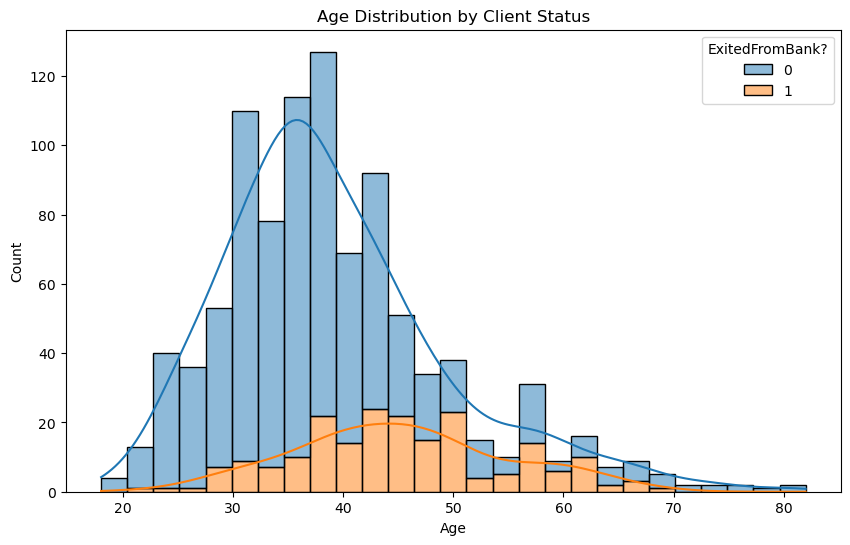

In [63]:
# Plot Age distribution for Exited vs Non-Exited
plt.figure(figsize=(10,6))
sns.histplot(data=df_cleaned, x='Age', hue='ExitedFromBank?', multiple='stack', kde=True)
plt.title('Age Distribution by Client Status')
plt.xlabel('Age')
plt.ylabel('Count')
plt.savefig(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\5. Data Ethics & Applied Analytics\Viz\age_distribution.png')
plt.show()

**Balance Analysis**

In [32]:
# Balance function 
df_cleaned['Balance'] = pd.to_numeric(df_cleaned['Balance'].replace('[\$,]', '', regex=True), errors='coerce')

# Grouping by 'ExitedFromBank?' to get mean and mode for Balance
balance_stats = df_cleaned.groupby('ExitedFromBank?').agg(
    mean_balance=('Balance', 'mean'),
    mode_balance=('Balance', lambda x: x.mode()[0] if not x.mode().empty else None)
)

print("\nBalance Statistics (Exited vs Non-Exited):")
print(balance_stats)


Balance Statistics (Exited vs Non-Exited):
                 mean_balance  mode_balance
ExitedFromBank?                            
0                74927.597334           0.0
1                90495.705920           0.0


<>:2: SyntaxWarning: invalid escape sequence '\$'
<>:2: SyntaxWarning: invalid escape sequence '\$'
C:\Users\isaac\AppData\Local\Temp\ipykernel_14476\3776024998.py:2: SyntaxWarning: invalid escape sequence '\$'
  df_cleaned['Balance'] = pd.to_numeric(df_cleaned['Balance'].replace('[\$,]', '', regex=True), errors='coerce')


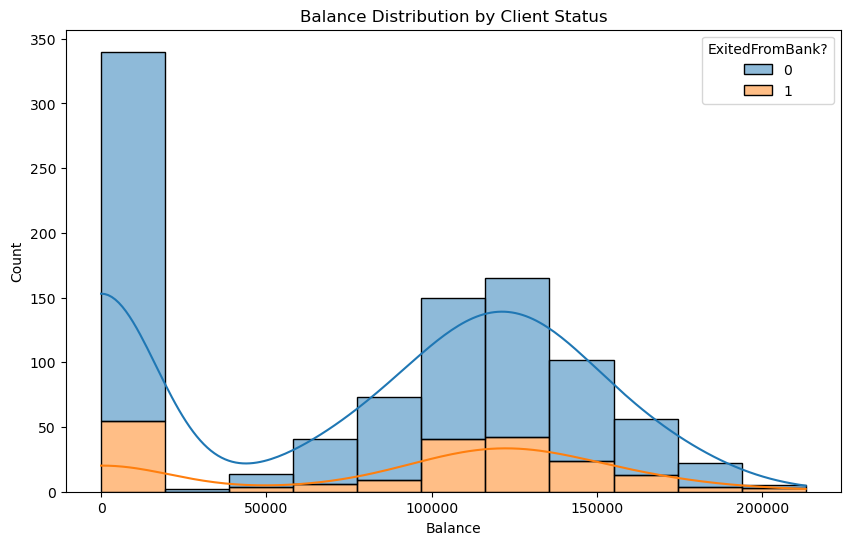

In [57]:
# Plot Balance distribution for Exited vs Non-Exited
plt.figure(figsize=(10,6))
sns.histplot(data=df_cleaned, x='Balance', hue='ExitedFromBank?', multiple='stack', kde=True)
plt.title('Balance Distribution by Client Status')
plt.xlabel('Balance')
plt.ylabel('Count')
#plt.savefig(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\5. Data Ethics & Applied Analytics\Viz\balance_distribution.png')
plt.show()

**Tenure Analysis**

In [37]:
# Calculate the mean for 'Tenure' column
tenure_mean = df_cleaned.groupby('ExitedFromBank?')['Tenure'].mean()

# Calculate the mode for 'Tenure' column separately
tenure_mode = df_cleaned.groupby('ExitedFromBank?')['Tenure'].apply(lambda x: x.mode()[0] if not x.mode().empty else None)

# Combine mean and mode into a DataFrame
tenure_stats = pd.DataFrame({
    'mean_tenure': tenure_mean,
    'mode_tenure': tenure_mode
})

print("\nTenure Statistics (Exited vs Non-Exited):")
print(tenure_stats)



Tenure Statistics (Exited vs Non-Exited):
                 mean_tenure  mode_tenure
ExitedFromBank?                          
0                   5.185956            9
1                   4.711443            1


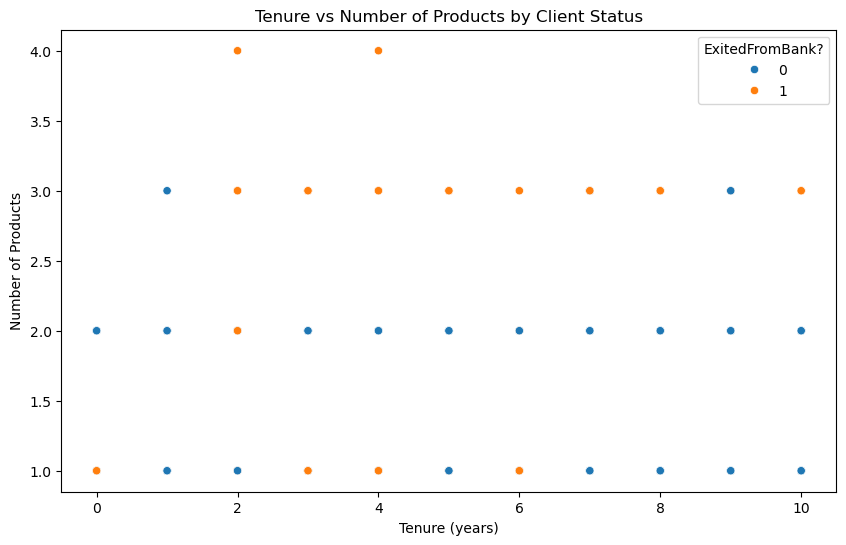

In [65]:
# Scatter plot of Tenure vs Number of Products, colored by Exited status
plt.figure(figsize=(10,6))
sns.scatterplot(data=df_cleaned, x='Tenure', y='NumOfProducts', hue='ExitedFromBank?')
plt.title('Tenure vs Number of Products by Client Status')
plt.xlabel('Tenure (years)')
plt.ylabel('Number of Products')
plt.savefig(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\5. Data Ethics & Applied Analytics\Viz\tenure_products.png')
plt.show()

**Number of Products Analysis**

In [40]:
# Calculate the mean for 'NumOfProducts' column
products_mean = df_cleaned.groupby('ExitedFromBank?')['NumOfProducts'].mean()

# Combine into a DataFrame (no mode for NumOfProducts)
products_stats = pd.DataFrame({
    'mean_num_of_products': products_mean
})

print("\nNumber of Products Statistics (Exited vs Non-Exited):")
print(products_stats)


Number of Products Statistics (Exited vs Non-Exited):
                 mean_num_of_products
ExitedFromBank?                      
0                            1.534460
1                            1.457711


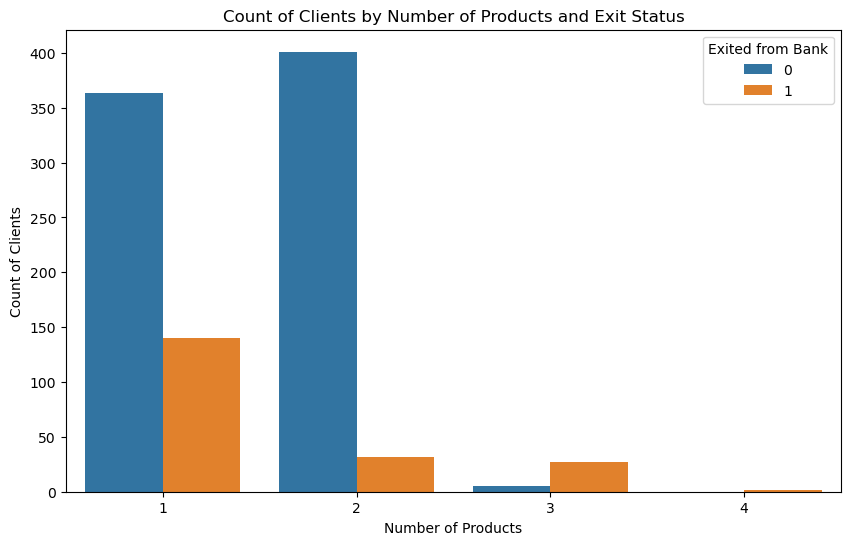

In [67]:
# Bar plot to show the count of clients by Number of Products, segmented by Exited Status
plt.figure(figsize=(10,6))
sns.countplot(data=df_cleaned, x='NumOfProducts', hue='ExitedFromBank?')
plt.title('Count of Clients by Number of Products and Exit Status')
plt.xlabel('Number of Products')
plt.ylabel('Count of Clients')
plt.legend(title='Exited from Bank', loc='upper right')
plt.savefig(r'C:\Users\isaac\Documents\CareerFoundry\2. Data Inmersion\5. Data Ethics & Applied Analytics\Viz\products_count_exit_status.png')
plt.show()

**IsActiveMember Analysis**

In [48]:
# Calculating the proportion of active members in each group
active_member_stats = df_cleaned.groupby('ExitedFromBank?')['IsActiveMember'].value_counts(normalize=True).unstack()

print("\nIsActiveMember Statistics (Exited vs Non-Exited):")
print(active_member_stats)


IsActiveMember Statistics (Exited vs Non-Exited):
IsActiveMember          0         1
ExitedFromBank?                    
0                0.431730  0.568270
1                0.696517  0.303483


**Has Credit Card (HasCrCard?) Analysis**

In [50]:
# Calculating the proportion of clients with credit cards in each grou
cr_card_stats = df_cleaned.groupby('ExitedFromBank?')['HasCrCard?'].value_counts(normalize=True).unstack()

print("\nHasCrCard Statistics (Exited vs Non-Exited):")
print(cr_card_stats)


HasCrCard Statistics (Exited vs Non-Exited):
HasCrCard?              0         1
ExitedFromBank?                    
0                0.293888  0.706112
1                0.298507  0.701493


---

### 
**Key Risk Factors for Client Attrit
n:**
1. **Age**: Clients aged 45 and older are more likely to leave.
2. **Tenure**: Short tenures, especially around the 1-year mark, are linked to higher attrition rates.
3. **Product Engagement**: Clients using fewer products are at greater risk of leaving.
4. **Active Membership**: Lack of regular engagement is a strong predictor of client.

---

**Recommendations for Pig E. Bank:**
- Prioritize efforts to increase product usage and ensure that new clients, particularly within the first few years, feel valued to boost retention.
- Create strategies to re-engage older clients and provide services that align with their evolving financial needs.
- Investigate the reasons behind the departure of clients with higher balances and address their spec further revisions!

---

### Decision Tree for logistic regression beta model in Customer Retention Project summarize.